In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date

In [11]:
df_crime_new2 = pd.read_csv('cleaned_crime_dataset.csv')

/Users/nadinemeister/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1,3,7,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_crime_new2.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,0,TESTTEST2,423,NaN,ASSAULT,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [13]:
df_crime_new2['OFFENSE_DESCRIPTION'].value_counts().head(40)

LARCENY                                           59311
ASSAULT                                           40901
INVESTIGATE PERSON                                32934
VERBAL DISPUTE                                    27097
M/V - LEAVING SCENE - PROPERTY DAMAGE             26149
VANDALISM                                         23649
INVESTIGATE PROPERTY                              19054
TOWED MOTOR VEHICLE                               17918
THREATS TO DO BODILY HARM                         14839
PROPERTY - LOST                                   12234
WARRANT ARREST                                    11038
FRAUD - FALSE PRETENSE / SCHEME                    7793
MISSING PERSON - LOCATED                           7468
PROPERTY - FOUND                                   5992
AUTO THEFT                                         5686
MISSING PERSON                                     5616
HARASSMENT                                         5560
TRESPASSING                                     

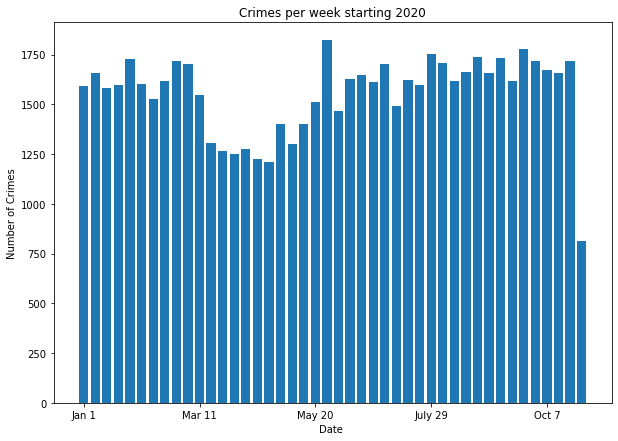

In [36]:
fig = plt.figure(figsize=[10,7])
plt.bar(df_crime_new2['week#_mod'][df_crime_new2['YEAR'] == 2020].value_counts().index.values, df_crime_new2['week#_mod'][df_crime_new2['YEAR'] == 2020].value_counts())
plt.xlabel('Date ')
plt.ylabel('Number of Crimes')
plt.title('Crimes per week starting 2020')
positions = (0, 10, 20, 30, 40)
labels = ("Jan 1", "Mar 11", "May 20", "July 29", "Oct 7")
plt.xticks(positions, labels)
plt.show()

#fig.savefig('2020_crimes_per_week.png', dpi = 300)

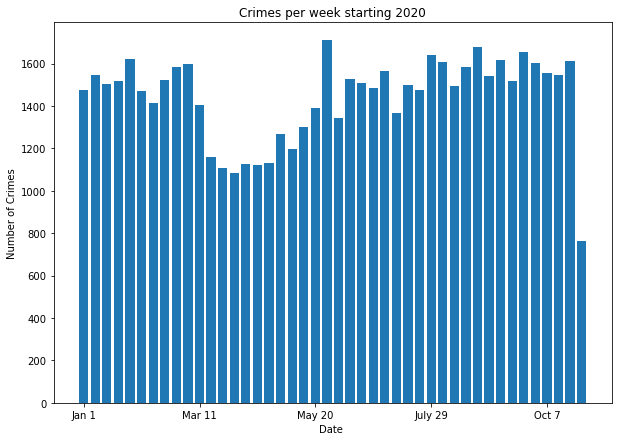

In [21]:
fig = plt.figure(figsize=[10,7])
plt.bar(df_crime_new2['week#_mod'][df_crime_new2['YEAR'] == 2020].value_counts().index.values, df_crime_new2['week#_mod'][df_crime_new2['YEAR'] == 2020].value_counts())
plt.xlabel('Date ')
plt.ylabel('Number of Crimes')
plt.title('Crimes per week starting 2020')
positions = (0, 10, 20, 30, 40)
labels = ("Jan 1", "Mar 11", "May 20", "July 29", "Oct 7")
plt.xticks(positions, labels)
plt.show()

#fig.savefig('2020_crimes_per_week.png', dpi = 300)

In [18]:
df_crime_new2['week#_mod'] = (df_crime_new2['week#']/7).astype(int)
df_crime_new2['week#_mod'] = df_crime_new2['week#_mod'].astype(int)

In [16]:
df_crime_new2['week#'] = 0

In [17]:
for ind, row in df_crime_new2.iterrows():
    row = row['OCCURRED_ON_DATE']
    sep_row = row.split()[0].split('-')
    df_crime_new2['week#'][ind] = (date(int(sep_row[0]),int(sep_row[1]),int(sep_row[2]))-date(2020,1,1)).days

    
#how to vectorize thiiiisss

<ipython-input-17-2f26ef106e12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_crime_new2['week#'][ind] = (date(int(sep_row[0]),int(sep_row[1]),int(sep_row[2]))-date(2020,1,1)).days


In [19]:
df_crime_new2['OFFENSE_DESCRIPTION'].value_counts().head(20)

LARCENY                                  59311
ASSAULT                                  40901
INVESTIGATE PERSON                       32934
VERBAL DISPUTE                           27097
M/V - LEAVING SCENE - PROPERTY DAMAGE    26149
VANDALISM                                23649
INVESTIGATE PROPERTY                     19054
TOWED MOTOR VEHICLE                      17918
THREATS TO DO BODILY HARM                14839
PROPERTY - LOST                          12234
WARRANT ARREST                           11038
FRAUD - FALSE PRETENSE / SCHEME           7793
MISSING PERSON - LOCATED                  7468
PROPERTY - FOUND                          5992
AUTO THEFT                                5686
MISSING PERSON                            5616
HARASSMENT                                5560
TRESPASSING                               4819
FRAUD - CREDIT CARD / ATM FRAUD           4592
VAL - OPERATING AFTER REV/SUSP.           4011
Name: OFFENSE_DESCRIPTION, dtype: int64

In [20]:
df_crime_new2.head()

,Unnamed: 0,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,week#,week#_mod
0,0,TESTTEST2,423,NaN,ASSAULT,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)",-77,-11
1,1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)",199,28
2,2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)",175,25
3,3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)",-12,-1
4,4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)",-70,-10
